 ## Домашнее задание Проверка гипотез

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


<div class="alert alert-info">
<b>Задание № 1</b>
    
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.
</div>

In [3]:
def check_normality(data):
    from scipy import stats
    
    statistic, p_value = stats.shapiro(data)
    
    print(f'Статистика теста: {statistic:.4f}')
    print(f'p-значение: {p_value:.4f}')
    
    if p_value < 0.05:  
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
- Является ли результат полезным с практической точки зрения? Почему да или нет?
</div>

In [5]:
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170

In [6]:

t_stat, p_value = stats.ttest_ind(mens, womens)

print(f't-статистика: {t_stat:.4f}')
print(f'p-значение: {p_value:.4f}')


t-статистика: 28.3136
p-значение: 0.0000


/home/alekspy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alekspy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


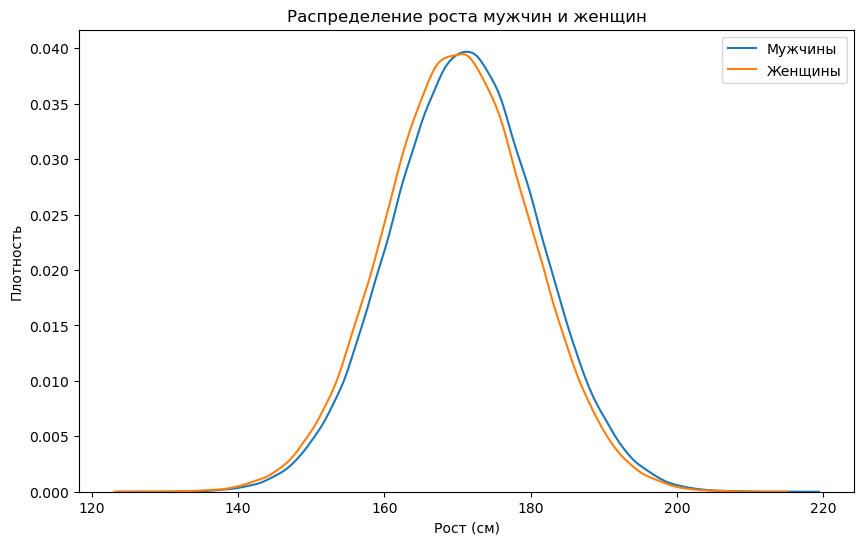


Практическая значимость:
Разница средних значений: 1.03 см


In [7]:

plt.figure(figsize=(10, 6))
sns.kdeplot(data=mens, label='Мужчины')
sns.kdeplot(data=womens, label='Женщины')
plt.title('Распределение роста мужчин и женщин')
plt.xlabel('Рост (см)')
plt.ylabel('Плотность')
plt.legend()
plt.show()

print("\nПрактическая значимость:")
print(f"Разница средних значений: {np.mean(mens) - np.mean(womens):.2f} см")

разница в 1 сантиметр маленькая для роста человека. я считаю что она не существенная. я считаю что она не значимая с практической точки зрения. так как всего один сантиметр даже не влияет на выбор одежды.

<div class="alert alert-info">
<b>Задание № 3</b>

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.
</div>

In [8]:
test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

In [9]:
print("Проверка нормальности для команды тестировщиков:")
check_normality(test_team)

print("\nПроверка нормальности для команды разработчиков:")
check_normality(developer_team)


Проверка нормальности для команды тестировщиков:
Статистика теста: 0.8254
p-значение: 0.0046
Отклоняем нулевую гипотезу >> Данные распределены не нормально

Проверка нормальности для команды разработчиков:
Статистика теста: 0.7527
p-значение: 0.0005
Отклоняем нулевую гипотезу >> Данные распределены не нормально


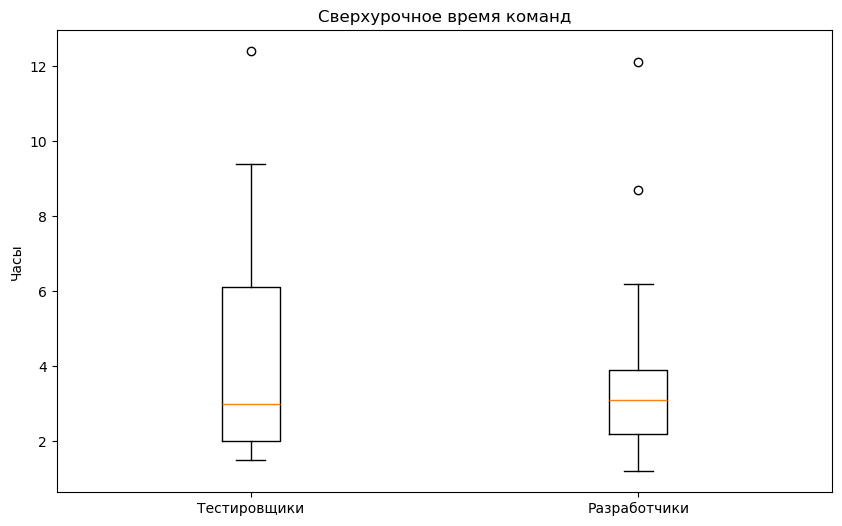

In [10]:

plt.figure(figsize=(10, 6))
plt.boxplot([test_team, developer_team], labels=['Тестировщики', 'Разработчики'])
plt.title('Сверхурочное время команд')
plt.ylabel('Часы')
plt.show()



In [11]:
stat, p_value = stats.mannwhitneyu(test_team, developer_team, alternative='two-sided')

print("\nРезультаты тест Манна-Уитни:")
print(f"Статистика теста: {stat:.4f}")
print(f"p-значение: {p_value:.4f}")

if p_value < 0.05:
    print("\nЕсть  различия между командами, есть разница в сверхурочной работе")
    print(f"Среднее время тестировщиков: {np.mean(test_team):.2f} часов")
    print(f"Среднее время разработчиков: {np.mean(developer_team):.2f} часов")
else:
    print("\nКоманды работают примерно одинаково, существенной разницы нет")


Результаты тест Манна-Уитни:
Статистика теста: 151.5000
p-значение: 0.8226

Команды работают примерно одинаково, существенной разницы нет


<div class="alert alert-info">
<b>Задание № 4</b>

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.
</div>

In [12]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1];
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9];
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3];

In [13]:
# Проверка нормальности для всех групп
print("Проверка нормальности:")
print("\nТолько грудное вскармливание:")
check_normality(only_breast)
print("\nТолько смесь:")
check_normality(only_formula)
print("\nОба типа:")
check_normality(both)

Проверка нормальности:

Только грудное вскармливание:
Статистика теста: 0.9508
p-значение: 0.4694
Не отклоняем нулевую гипотезу >> Данные распределены нормально

Только смесь:
Статистика теста: 0.9761
p-значение: 0.8879
Не отклоняем нулевую гипотезу >> Данные распределены нормально

Оба типа:
Статистика теста: 0.9746
p-значение: 0.7973
Не отклоняем нулевую гипотезу >> Данные распределены нормально


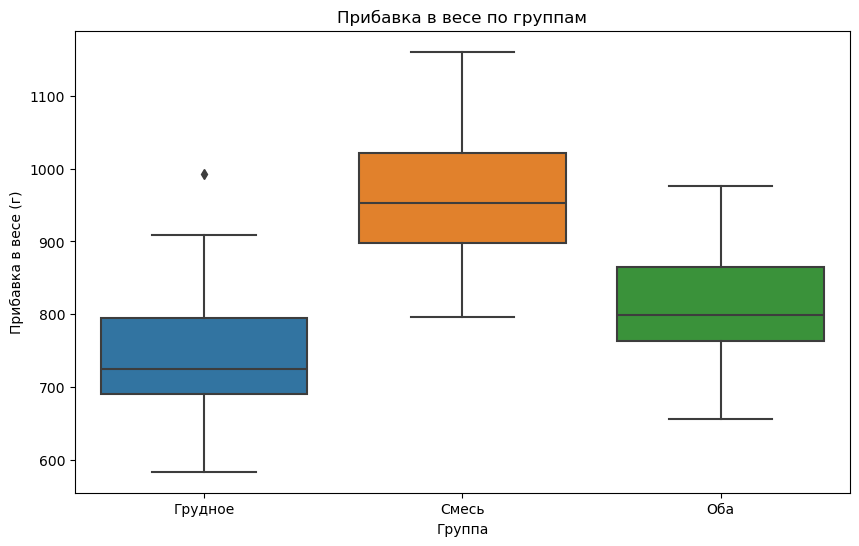

In [14]:


# Визуализация
plt.figure(figsize=(10, 6))
df = pd.DataFrame({
    'Значения': only_breast + only_formula + both,
    'Группа': ['Грудное']*len(only_breast) + 
              ['Смесь']*len(only_formula) + 
              ['Оба']*len(both)
})
sns.boxplot(data=df, x='Группа', y='Значения')
plt.title('Прибавка в весе по группам')
plt.ylabel('Прибавка в весе (г)')
plt.show()



In [17]:
f_stat, p_value = stats.f_oneway(only_breast, only_formula, both)
print(f'\nРезультаты ANOVA:')
print(f'F-статистика: {f_stat:.4f}')
print(f'p-значение: {p_value:.4f}')

if p_value < 0.05:
    print("\nЕсть статистически значимые различия между группами")
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    all_data = np.concatenate([only_breast, only_formula, both])
    groups = ['Грудное']*len(only_breast) + ['Смесь']*len(only_formula) + ['Оба']*len(both)
    
    tukey = pairwise_tukeyhsd(all_data, groups)
    print("\nтест Тьюки:")
    print(tukey)
else:
    print("\nНет статистически значимых различий между группами")



if p_value < 0.05:
    
    # Средние значения 
    print(f"\nСредний прирост веса:")
    print(f"- Дети на грудном: {np.mean(only_breast):.1f} грамм")
    print(f"- Дети на смеси: {np.mean(only_formula):.1f} грамм")
    print(f"- Дети на обоих типах: {np.mean(both):.1f} грамм")
    
else:
    print("\nМежду группами нет существенной разницы в весе")


Результаты ANOVA:
F-статистика: 26.7013
p-значение: 0.0000

Есть статистически значимые различия между группами

Post-hoc анализ (тест Тьюки):
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1 group2 meandiff p-adj   lower    upper   reject
-------------------------------------------------------
Грудное    Оба  60.1286 0.0995  -8.8912 129.1485  False
Грудное  Смесь 209.3923    0.0 137.3508 281.4337   True
    Оба  Смесь 149.2636    0.0  82.3651 216.1621   True
-------------------------------------------------------

Средний прирост веса:
- Дети на грудном: 749.8 грамм
- Дети на смеси: 959.2 грамм
- Дети на обоих типах: 810.0 грамм


anova тест показал, что разница между группами есть.
тест Тьюки показал между какими группами есть разница.
самая большая разница между группами "грудным" и "смесью"
на смешанном питании показывают средние результаты
получется на смеси набирают больше веса чем на грудном.
Не знаю это большая разница или нет для ребенка. Но если предстааить что ребенок весит килограм 10, это 10000 грамм,
то 200 грамм это 2% от веса ребенка. я бы не считал что это большая разница.
